In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv.imread('/Users/miguelcamargorojas/Documents/UP/PDI - Ago-dic23/images/butterfly.jpg')

In [3]:
canalB = img[:, :, 0]

In [4]:
canalB.shape

(356, 493)

In [5]:
copia_r = canalB # Esto NO se hace

In [6]:
copia_r.shape

(356, 493)

In [7]:
canalB[0, 0]

np.uint8(47)

In [8]:
copia_r[0, 0]

np.uint8(47)

In [9]:
copia_r[0, 0] = 255

In [10]:
copia_r[0, 0]

np.uint8(255)

In [11]:
canalB[0, 0]

np.uint8(255)

In [12]:
# Esto SÍ se hace
copia_r = canalB.copy()

In [13]:
canalB[0, 0]

np.uint8(255)

In [14]:
copia_r[0, 0]

np.uint8(255)

In [15]:
copia_r[0, 0] = 0

In [16]:
canalB[0, 0]

np.uint8(255)

In [17]:
"""
k = 127
s = 
0, if r < k
255, if r >= k
"""
k = 127
# iterar en todos los elementos de R
filas, columnas = copia_r.shape
# print(filas, columnas)
for fila in range(filas): # img_rgb[:, :, 0]
    for columna in range(columnas):
        valor_actual = canalB[fila, columna]
        if valor_actual < k:
            copia_r[fila, columna] = 0
        else:
            copia_r[fila, columna] = 255

In [18]:
np.unique(canalB)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [19]:
np.unique(copia_r)

array([  0, 255], dtype=uint8)

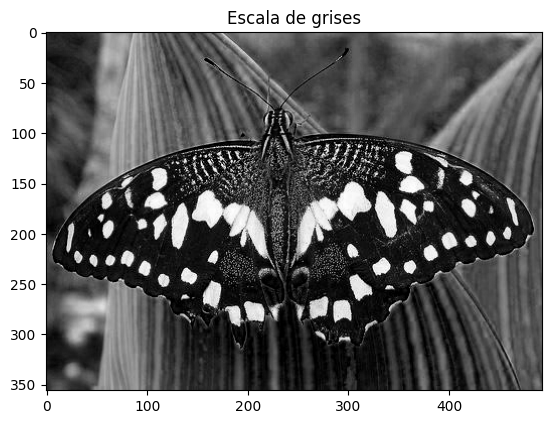

In [20]:
plt.imshow(canalB, cmap="gray")
plt.title("Escala de grises")
plt.show()

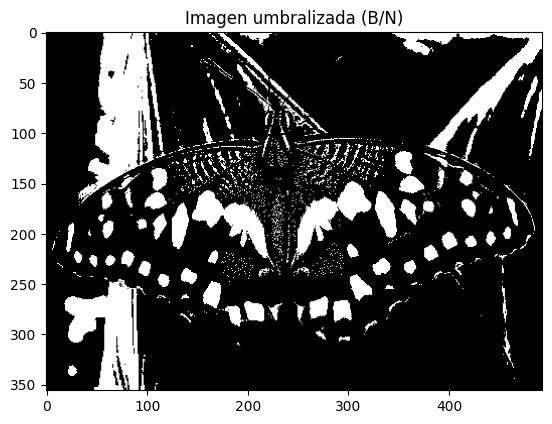

In [21]:
plt.imshow(copia_r, cmap="gray")
plt.title("Imagen umbralizada (B/N)")
plt.show()

In [22]:
# NO SE PUEDE CREAR UNA CONSTANTE, PERO...
PI = 3.14151926

In [23]:
cv.THRESH_BINARY_INV

1

In [24]:
img_bin = cv.threshold(canalB, 127, 255, cv.THRESH_BINARY)[1]

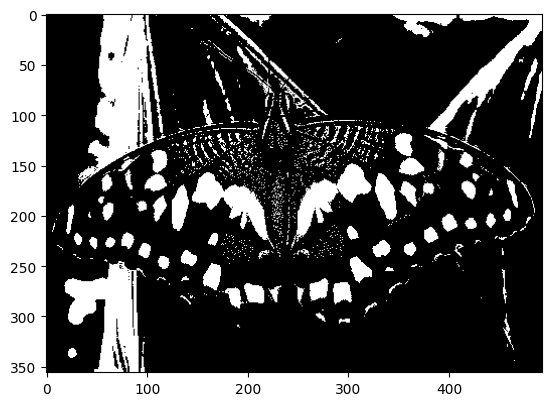

In [25]:
plt.imshow(img_bin, cmap="gray")
plt.show()

---

In [27]:
"""
NEGATIVA
RGB -> CMY
L = 256
s = L - 1 - r
s = 256 - 1 - r
s = 255 - r
"""
canalR = img[:, :, -1]
img_neg = canalR.copy()
# iterar en todos los elementos de R
filas, columnas = img_neg.shape
# print(filas, columnas)
for fila in range(filas): # img_rgb[:, :, 0]
    for columna in range(columnas):
        img_neg[fila, columna] = 255 - canalR[fila, columna]

In [30]:
canalR.shape

(356, 493)

In [29]:
np.hstack((canalR, img_neg))

array([[ 50,  50,  49, ..., 110, 101,  93],
       [ 53,  51,  47, ..., 106,  99,  90],
       [ 56,  51,  44, ..., 103,  94,  87],
       ...,
       [ 58,  58,  59, ...,  37,  52,  65],
       [ 56,  56,  58, ...,  37,  49,  61],
       [ 60,  60,  62, ...,  37,  47,  57]], shape=(356, 986), dtype=uint8)

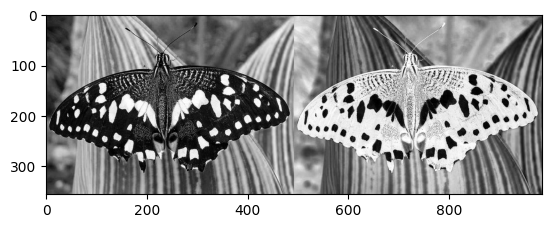

In [31]:
plt.imshow(np.hstack((canalR, img_neg)), cmap="gray")
plt.show()

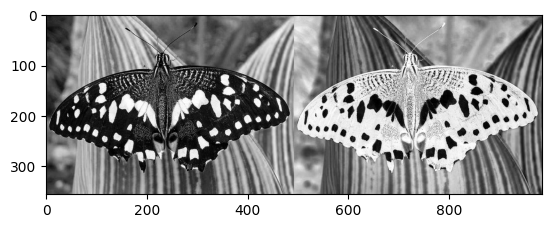

In [33]:
plt.imshow(np.hstack((canalR, ~canalR)), cmap="gray")
plt.show()

In [ ]:
# copia_b = canal_B.copy()
# filas, columnas = copia_b.shape
# k=127
# for fila in range(filas):
#     for columna in range(columnas):
#         copia_b[fila,columna]=255-copia_b[fila,columna]

---

In [39]:
np.log(1+0) # Log natural (base e)

np.float64(0.0)

In [44]:
canalR.max().item()

255

In [45]:
np.log(1 + np.max(canalR).item())

np.float64(5.545177444479562)

In [49]:
# s = c log(1 + r)

canalR = img[:, :, -1]
img_log = canalR.copy()

C = 255 / (np.log(1 + np.max(canalR).item())) # 255/(log (1 + m))
# iterar en todos los elementos de R
filas, columnas = img_neg.shape
# print(filas, columnas)
for fila in range(filas): # img_rgb[:, :, 0]
    for columna in range(columnas):
        img_log[fila, columna] = C * np.log(1 + canalR[fila, columna]).item()

/var/folders/vr/9n_h2gsj7m16qv6j55xbdp2m0000gn/T/ipykernel_16050/2354469738.py:12: RuntimeWarning: overflow encountered in scalar add
  img_log[fila, columna] = C * np.log(1 + canalR[fila, columna]).item()
/var/folders/vr/9n_h2gsj7m16qv6j55xbdp2m0000gn/T/ipykernel_16050/2354469738.py:12: RuntimeWarning: divide by zero encountered in log
  img_log[fila, columna] = C * np.log(1 + canalR[fila, columna]).item()
/var/folders/vr/9n_h2gsj7m16qv6j55xbdp2m0000gn/T/ipykernel_16050/2354469738.py:12: RuntimeWarning: invalid value encountered in cast
  img_log[fila, columna] = C * np.log(1 + canalR[fila, columna]).item()


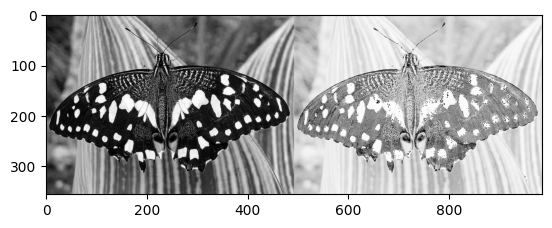

In [50]:
plt.imshow(np.hstack((canalR, img_log)), cmap="gray")
plt.show()

In [51]:
aero = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI - Ago-dic23/images/aero3.jpg")

In [52]:
aero_B = aero[:, :, 0]

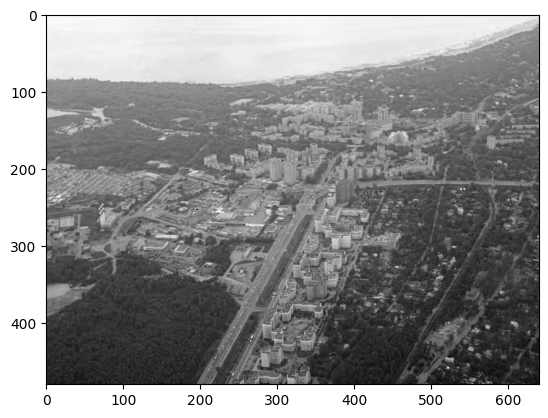

In [53]:
plt.imshow(aero_B, cmap="gray")
plt.show()

In [55]:
aero_log = np.log(aero_B)

In [58]:
aero_log.max()

np.float16(5.543)

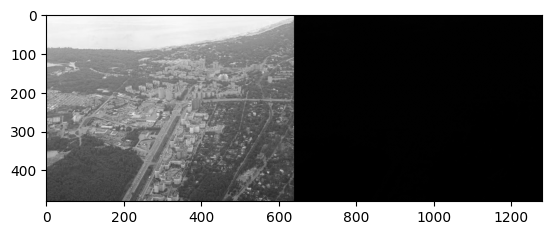

In [57]:
plt.imshow(np.hstack((aero_B, aero_log)), cmap="gray")
plt.show()

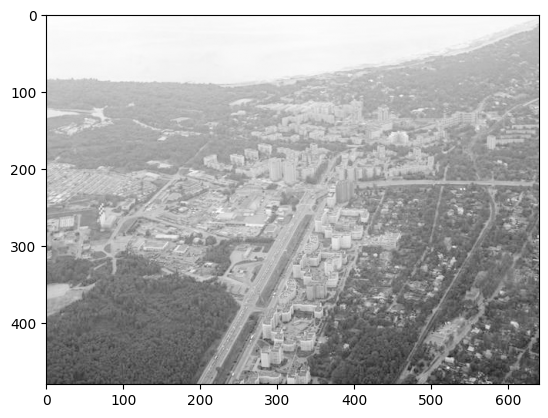

In [64]:
aero_log = 2 * np.log(aero_B)
plt.imshow(aero_log, cmap="gray")
plt.show()